In [0]:
# libraries

from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import mlflow

import pandas as pd
from plotnine import *
from hyperopt import fmin, tpe, STATUS_OK, Trials
import numpy as np
from hyperopt import hp

In [0]:
# double check to make sure all columns are double type or string
deltaPath = "/delta/nb_airbnb" 
clean_nb = spark.read.format("delta").load(deltaPath)
display(clean_nb.printSchema()) 
display(clean_nb)

root
-- host_is_superhost: string (nullable = true)
-- host_response_time: string (nullable = true)
-- host_response_rate: double (nullable = true)
-- host_acceptance_rate: double (nullable = true)
-- host_total_listings_count: double (nullable = true)
-- neighbourhood_cleansed: string (nullable = true)
-- latitude: double (nullable = true)
-- longitude: double (nullable = true)
-- room_type: string (nullable = true)
-- accommodates: double (nullable = true)
-- bedrooms: double (nullable = true)
-- beds: double (nullable = true)
-- minimum_nights: double (nullable = true)
-- availability_30: double (nullable = true)
-- availability_60: double (nullable = true)
-- availability_90: double (nullable = true)
-- availability_365: double (nullable = true)
-- number_of_reviews: double (nullable = true)
-- review_scores_rating: double (nullable = true)
-- review_scores_accuracy: double (nullable = true)
-- review_scores_cleanliness: double (nullable = true)
-- review_scores_checkin: double (nullable = true)
-- review_scores_communication: double (nullable = true)
-- review_scores_location: double (nullable = true)
-- review_scores_value: double (nullable = true)
-- reviews_per_month: double (nullable = true)
-- price: double (nullable = true)
-- bathrooms: double (nullable = true)
-- bedrooms_na: double (nullable = true)
-- bathrooms_na: double (nullable = true)
-- beds_na: double (nullable = true)
-- review_scores_rating_na: double (nullable = true)
-- review_scores_accuracy_na: double (nullable = true)
-- review_scores_cleanliness_na: double (nullable = true)
-- review_scores_checkin_na: double (nullable = true)
-- review_scores_communication_na: double (nullable = true)
-- review_scores_location_na: double (nullable = true)
-- review_scores_value_na: double (nullable = true)

host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,bathrooms,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
f,within a few hours,1.0,1.0,1.0,Saint Andrews,45.13241,-67.04725,Entire home/apt,6.0,2.0,5.0,2.0,5.0,16.0,40.0,315.0,21.0,4.67,4.71,4.57,5.0,4.86,4.9,4.62,0.97,242.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,1.0,0.33,1.0,Dundas,46.32857,-64.52445,Entire home/apt,5.0,3.0,3.0,7.0,0.0,0.0,17.0,292.0,8.0,5.0,4.88,5.0,4.86,4.71,5.0,4.71,0.11,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a few hours,1.0,1.0,2.0,City of Saint John,45.27727,-66.0604,Entire home/apt,4.0,2.0,5.0,2.0,0.0,0.0,17.0,292.0,44.0,4.59,4.68,4.77,4.68,4.84,4.68,4.73,1.27,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a few hours,1.0,0.67,1.0,Sackville,45.894821,-64.376556,Private room,2.0,1.0,1.0,1.0,2.0,5.0,26.0,275.0,52.0,4.77,4.9,4.81,4.88,4.92,4.92,4.82,0.53,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,null,null,0.0,1.0,Shippagan,47.86785,-64.52187,Entire home/apt,6.0,2.0,2.0,7.0,0.0,0.0,0.0,261.0,3.0,4.67,3.67,4.67,4.67,4.67,4.67,4.33,0.13,135.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,0.67,null,1.0,Cambridge,45.85825,-66.11696,Entire home/apt,2.0,2.0,1.0,7.0,23.0,53.0,83.0,358.0,0.0,4.92,4.96,4.95,5.0,5.0,4.94,4.9,null,130.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
t,within an hour,1.0,0.97,3.0,Moncton,46.10555,-64.81432,Entire home/apt,7.0,3.0,4.0,3.0,7.0,22.0,49.0,323.0,192.0,4.88,4.92,4.86,4.94,4.95,4.79,4.86,2.27,138.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,1.0,1.0,8.0,City of Saint John,45.27233,-66.05694,Private room,2.0,1.0,1.0,1.0,25.0,55.0,85.0,360.0,126.0,4.58,4.63,4.83,4.65,4.67,4.67,4.64,1.71,145.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,1.0,1.0,0.0,Gagetown,45.78008,-66.14374,Entire home/apt,2.0,1.0,1.0,2.0,17.0,47.0,77.0,77.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,215.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,within a day,0.95,0.83,10.0,City of Saint John,45.27358,-66.05307,Private room,2.0,1.0,1.0,1.0,0.0,0.0,0.0,80.0,39.0,4.84,4.95,4.79,4.89,4.92,4.82,4.84,0.54,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dropcol = ("latitude", "longitude")
final_nb = clean_nb.drop(*dropcol).cache()
display(final_nb)

host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,bathrooms,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
f,within a few hours,1.0,1.0,1.0,Saint Andrews,Entire home/apt,6.0,2.0,5.0,2.0,5.0,16.0,40.0,315.0,21.0,4.67,4.71,4.57,5.0,4.86,4.9,4.62,0.97,242.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,1.0,0.33,1.0,Dundas,Entire home/apt,5.0,3.0,3.0,7.0,0.0,0.0,17.0,292.0,8.0,5.0,4.88,5.0,4.86,4.71,5.0,4.71,0.11,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a few hours,1.0,1.0,2.0,City of Saint John,Entire home/apt,4.0,2.0,5.0,2.0,0.0,0.0,17.0,292.0,44.0,4.59,4.68,4.77,4.68,4.84,4.68,4.73,1.27,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a few hours,1.0,0.67,1.0,Sackville,Private room,2.0,1.0,1.0,1.0,2.0,5.0,26.0,275.0,52.0,4.77,4.9,4.81,4.88,4.92,4.92,4.82,0.53,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,null,null,0.0,1.0,Shippagan,Entire home/apt,6.0,2.0,2.0,7.0,0.0,0.0,0.0,261.0,3.0,4.67,3.67,4.67,4.67,4.67,4.67,4.33,0.13,135.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,0.67,null,1.0,Cambridge,Entire home/apt,2.0,2.0,1.0,7.0,23.0,53.0,83.0,358.0,0.0,4.92,4.96,4.95,5.0,5.0,4.94,4.9,null,130.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
t,within an hour,1.0,0.97,3.0,Moncton,Entire home/apt,7.0,3.0,4.0,3.0,7.0,22.0,49.0,323.0,192.0,4.88,4.92,4.86,4.94,4.95,4.79,4.86,2.27,138.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,1.0,1.0,8.0,City of Saint John,Private room,2.0,1.0,1.0,1.0,25.0,55.0,85.0,360.0,126.0,4.58,4.63,4.83,4.65,4.67,4.67,4.64,1.71,145.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,within a day,1.0,1.0,0.0,Gagetown,Entire home/apt,2.0,1.0,1.0,2.0,17.0,47.0,77.0,77.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,215.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,within a day,0.95,0.83,10.0,City of Saint John,Private room,2.0,1.0,1.0,1.0,0.0,0.0,0.0,80.0,39.0,4.84,4.95,4.79,4.89,4.92,4.82,4.84,0.54,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:



(trainDF, testDF) = final_nb.randomSplit([.8, .2], seed=42)

categoricalCols = [field for (field, dataType) in trainDF.dtypes if dataType == "string"]
indexOutputCols = [x + "Index" for x in categoricalCols]

stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=indexOutputCols, handleInvalid="skip")

numericCols = [field for (field, dataType) in trainDF.dtypes if ((dataType == "double") & (field != "price"))]
assemblerInputs = indexOutputCols + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features",handleInvalid='skip')




In [0]:



categoricalCols = [field for (field, dataType) in trainDF1.dtypes if dataType == "string"]
indexOutputCols = [x + "Index" for x in categoricalCols]

stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=indexOutputCols, handleInvalid="skip")

numericCols = [field for (field, dataType) in trainDF1.dtypes if ((dataType == "double") & (field != "price"))]
assemblerInputs = indexOutputCols + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features",handleInvalid='skip')


In [0]:
from pyspark.ml.regression import GBTRegressor
from pyspark.sql.functions import col


gbt = GBTRegressor(labelCol='price', maxBins=130)

paramGrid = ParamGridBuilder() \
  .addGrid(gbt.maxDepth, [2, 5])  \
  .addGrid(gbt.maxIter, [5, 10])  \
  .addGrid(gbt.stepSize, [0.1, 0.01]) \
  .build()

RMSE = RegressionEvaluator(
    labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol(), metricName="rmse"
)



cv_gbt= CrossValidator(estimator=gbt, evaluator=RMSE, estimatorParamMaps=paramGrid, 
                    numFolds=5, parallelism=4, seed=42)


gbtpipeline = Pipeline(stages=[stringIndexer, vecAssembler, cv_gbt])


In [0]:
cvModel = gbtpipeline.fit(trainDF) # creating the CVmodel

pred_gbt = cvModel.transform(testDF)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
import pandas as pd
from plotnine import *

# https://kb.databricks.com/machine-learning/extract-feature-info.html
def importance_plot(pipelineModel):
  va = pipelineModel.stages[-2]
  #tree = pipelineModel.stages[-1] # use this if CV is not in pipeline
  tree = pipelineModel.stages[-1].bestModel #only use when cv is in pipeline
  a = list(zip(va.getInputCols(), tree.featureImportances))
  dat_fi = pd.DataFrame({'variable': [i[0] for i in a], 'importance':[i[1] for i in a]}) \
    .sort_values('importance', ascending=False) \
    .assign(
      variable_cat = lambda x: pd.Categorical(x['variable'], categories = x.sort_values('importance', ascending=True)['variable']))

  plot = ggplot(dat_fi, aes(y = "importance", x = "variable_cat")) +\
    geom_col() +\
    coord_flip() +\
    theme_bw() +\
    labs(title = "Feature importance plot", x = "Feature")
  print(plot)
  return dat_fi

def model_results(predDF, labelCol = 'price', predictCol = 'prediction'):
  dat = predDF.select(labelCol, predictCol).toPandas()
  
  evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
  rmse = evaluator.evaluate(predDF)
  rmse = "RMSE data = %g" % rmse
  rsquared = "  R-squared:" + str(round(predDF.stat.corr('price', 'prediction'),2))

  
  p = ggplot(dat, aes(x = labelCol, y = predictCol)) +\
    geom_point() +\
    geom_abline(intercept=0, slope=1, color = "darkgrey") +\
    theme_bw() +\
    labs(title = "Predicted Vs. Actual: " +   rmse + rsquared)
  return p

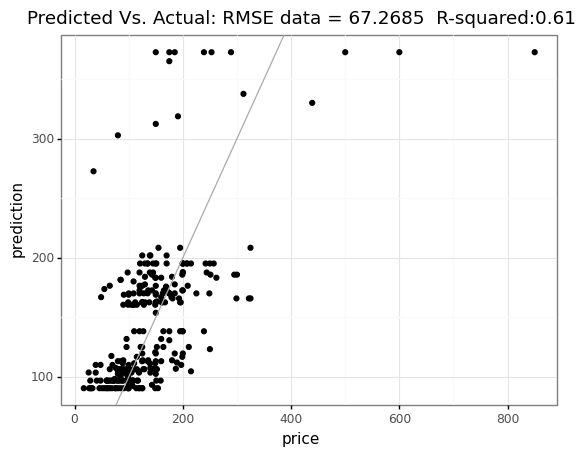

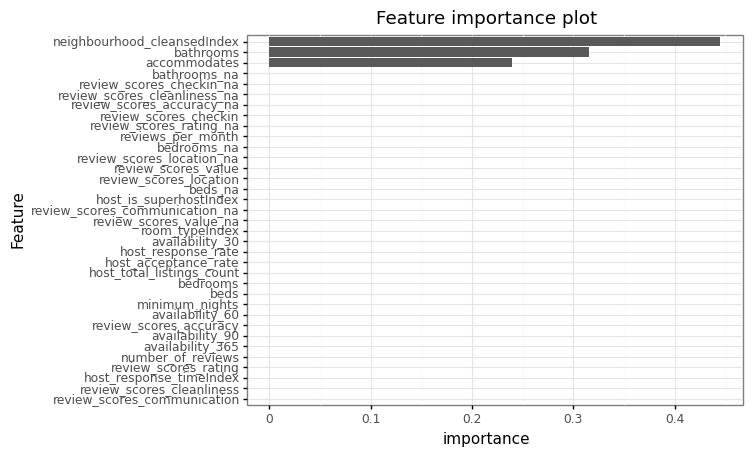

Out[21]:

,variable,importance,variable_cat
2,neighbourhood_cleansedIndex,0.444901,neighbourhood_cleansedIndex
24,bathrooms,0.315332,bathrooms
7,accommodates,0.239767,accommodates
0,host_is_superhostIndex,0.000000,host_is_superhostIndex
27,beds_na,0.000000,beds_na
21,review_scores_location,0.000000,review_scores_location
22,review_scores_value,0.000000,review_scores_value
23,reviews_per_month,0.000000,reviews_per_month
25,bedrooms_na,0.000000,bedrooms_na
26,bathrooms_na,0.000000,bathrooms_na


In [0]:
print(model_results(pred_gbt))
importance_plot(cvModel)